In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nose.tools
# Write your imports here

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [27]:
income_data = pd.read_csv(
    filepath_or_buffer='./data/adult.data',
    header=None,
    sep=',\s',
    engine='python')

income_data.columns = [
    "age",
    "work_class",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_weekly",
    "native_country",
    "salary"
]

In [28]:
income_data

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_weekly,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [63]:
nose.tools.assert_is_not_none(income_data)

### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [43]:
def get_num_people_with_high_income(dataframe):
#     return dataframe[dataframe.salary == ">50K"].shape[0]
#     return dataframe[dataframe.salary == ">50K"].salary.count()
#     return dataframe[dataframe.salary == ">50K"].count()[14]
    return dataframe[dataframe["salary"].str.contains(">50K")].count()[14]

get_num_people_with_high_income(income_data)

7841

In [64]:
# This cell contains hidden tests

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

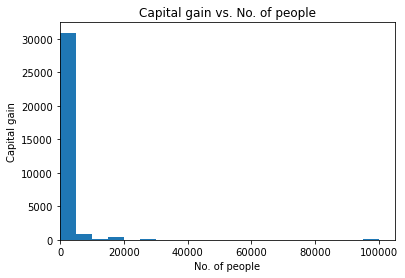

In [55]:
plt.hist(income_data.capital_gain, bins = 20)
plt.title("Capital gain vs. No. of people")
plt.xlabel("No. of people")
plt.ylabel("Capital gain")
plt.xlim(0)
plt.ylim(0)
plt.show()

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [61]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    return dataframe[dataframe.capital_gain >= threshold_gain].capital_gain.count()

get_num_people_with_higher_gain(income_data, 60000)

159

In [62]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

Create a pie chart of the number of people by marital status.

In [70]:
grouped_by_marital_status = income_data.groupby("marital_status")
grouped_by_marital_status.groups

{'Divorced': [2, 19, 24, 28, 32, 47, 53, 54, 64, 66, 84, 85, 91, 92, 98, 129, 134, 149, 150, 154, 158, 160, 162, 165, 181, 186, 187, 190, 196, 204, 207, 216, 221, 226, 229, 231, 233, 244, 259, 260, 274, 282, 283, 287, 291, 296, 299, 305, 313, 322, 347, 363, 368, 369, 378, 380, 381, 383, 396, 403, 410, 412, 415, 419, 423, 441, 466, 474, 488, 491, 493, 495, 503, 509, 514, 522, 524, 527, 530, 550, 554, 569, 577, 589, 602, 610, 640, 646, 665, 670, 685, 704, 705, 711, 714, 731, 762, 768, 772, 775, ...], 'Married-AF-spouse': [37, 1987, 2887, 3034, 3787, 8045, 8454, 11481, 11918, 13034, 14138, 15365, 16984, 18074, 18895, 23501, 25130, 25386, 27035, 27075, 27228, 29626, 29889], 'Married-civ-spouse': [1, 3, 4, 5, 7, 9, 10, 11, 14, 15, 18, 20, 22, 23, 25, 27, 29, 33, 34, 38, 39, 40, 41, 42, 45, 46, 48, 50, 52, 55, 56, 57, 58, 59, 60, 62, 63, 65, 67, 68, 72, 74, 76, 77, 79, 81, 82, 83, 86, 87, 90, 93, 94, 96, 97, 100, 101, 105, 109, 111, 112, 113, 115, 116, 117, 118, 121, 123, 125, 127, 128, 132,

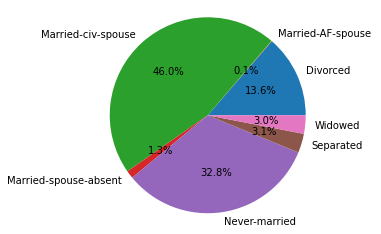

In [92]:
# YOUR CODE HERE
grouped_by_marital_status = income_data.groupby("marital_status")

labels = []
values = []
for key, value in grouped_by_marital_status:
    labels.append(key)
    values.append(value.count())

# labels = income_data.marital_status.unique()

plt.pie(count_values, labels = labels, autopct = "%.1f%%")
# plt.gca().set_aspect("equal")
plt.axis("equal")
plt.show()

### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [93]:
def most_prominent_marital_status(dataframe):
    status = ""
    num_people = 0
    # YOUR CODE HERE
    grouped_by_marital_status = dataframe.groupby("marital_status")
    for key, value in grouped_by_marital_status:
        if len(value) > num_people:
            num_people = len(value)
            status = key
    return (status, num_people)

most_prominent_marital_status(income_data)

('Married-civ-spouse', 14976)

In [94]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

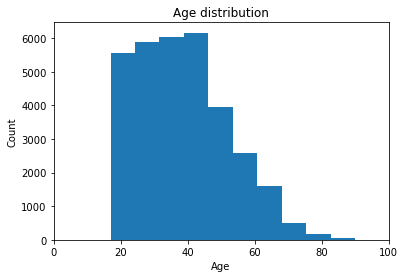

In [97]:
# YOUR CODE HERE
plt.hist(income_data.age)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim(0, 100)
plt.ylim(0)
plt.show()

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [98]:
def get_num_people_by_age_category(dataframe):
    young, middle_aged, old = (0, 0, 0)
    # YOUR CODE HERE
    young = dataframe[dataframe.age <= 30].age.count()
    middle_aged = dataframe[(dataframe.age > 30) & (dataframe.age <= 60)].age.count()
    old = dataframe[dataframe.age > 60].age.count()
    return young, middle_aged, old

In [99]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

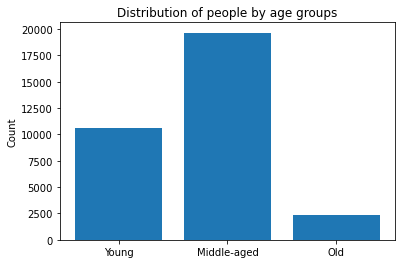

In [100]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [205]:
countries_ordered_people = income_data['native_country'].value_counts();

print(countries_ordered_people)

# index_second_country = countries_ordered_people.index[2]

income_data_no_questionmark = income_data

(income_data_no_questionmark.native_country.values == '?')

income_data_no_questionmark = income_data_no_questionmark.drop(income_data_no_questionmark[income_data_no_questionmark.native_country.values == '?'].index)

stillCointainsQMark = True in income_data_no_questionmark.native_country.values == '?'

print("\n")

print(stillCointainsQMark)

print("\n")

print(income_data_no_questionmark.native_country.value_counts())


United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [200]:
def get_second_highest_num_people(dataframe):
    num_people, country = 0, ""
    # YOUR CODE HERE
    income_data_no_questionmark = dataframe
    income_data_no_questionmark = income_data_no_questionmark.drop(income_data_no_questionmark[income_data_no_questionmark.native_country.values == '?'].index)
    
    countries_ordered_people = income_data_no_questionmark['native_country'].value_counts();
    #     print(countries_ordered_people)
    
    index_second_country=1
    num_people = countries_ordered_people[index_second_country]
    country = countries_ordered_people.index[index_second_country]
    
    return num_people, country

get_second_highest_num_people(income_data)

(643, 'Mexico')

In [206]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [215]:
grouped_by_occupation = income_data.groupby("occupation")
grouped_by_occupation.groups

{'?': [27, 61, 69, 77, 106, 128, 149, 154, 160, 187, 201, 221, 226, 243, 266, 297, 312, 326, 346, 347, 354, 397, 408, 430, 431, 449, 459, 471, 484, 486, 499, 511, 515, 517, 518, 539, 576, 580, 590, 591, 596, 648, 656, 668, 671, 686, 695, 734, 788, 789, 792, 806, 811, 830, 834, 885, 890, 903, 924, 931, 969, 982, 1019, 1034, 1035, 1039, 1046, 1097, 1100, 1131, 1134, 1152, 1167, 1175, 1180, 1185, 1208, 1215, 1217, 1262, 1282, 1290, 1312, 1317, 1325, 1347, 1349, 1371, 1388, 1404, 1420, 1433, 1441, 1452, 1458, 1504, 1544, 1562, 1569, 1570, ...], 'Adm-clerical': [0, 12, 33, 37, 43, 58, 66, 67, 76, 108, 126, 127, 137, 150, 151, 181, 184, 185, 204, 223, 228, 229, 232, 236, 245, 246, 249, 251, 253, 300, 304, 305, 308, 331, 333, 355, 358, 370, 375, 387, 388, 406, 438, 439, 441, 465, 485, 491, 495, 502, 508, 516, 527, 552, 557, 586, 594, 601, 605, 633, 646, 655, 677, 684, 711, 714, 731, 732, 747, 758, 761, 776, 785, 803, 813, 820, 823, 828, 831, 836, 851, 856, 860, 877, 879, 881, 892, 923, 933, 9

In [216]:
def get_mean_working_hours_by_income(dataframe):
    # YOUR CODE HERE
    grouped_by_occupation = income_data.groupby("occupation")
    means = grouped_by_occupation.hours_weekly.mean()
    return means.sort_values(ascending = False)

In [217]:
hours = get_mean_working_hours_by_income(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Handlers-cleaners    37.947445
Adm-clerical         37.558355
Other-service        34.701669
Priv-house-serv      32.885906
?                    31.906131
Name: hours_weekly, dtype: float64


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

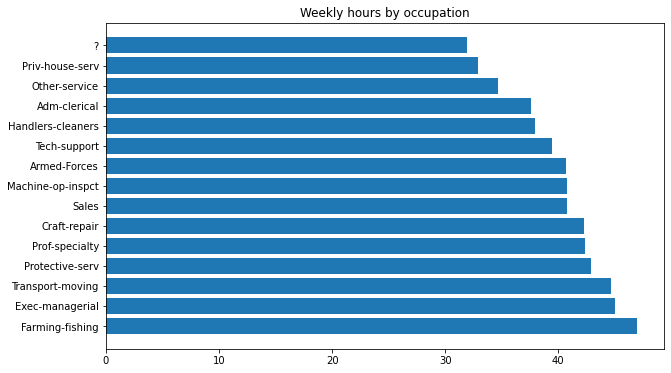

In [219]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.xlabel("Hour")
plt.show()